In [9]:
import numpy as np
import json
from os import listdir

import pandas as pd

import matplotlib.pyplot as plt

from scipy.spatial.distance import directed_hausdorff

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

from sklearn.neighbors import NearestNeighbors

"""

http://cgm.cs.mcgill.ca/~godfried/teaching/cg-projects/98/normand/main.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.directed_hausdorff.html

http://web.stanford.edu/class/cs273/scribing/2004/class8/scribe8.pdf


    directed_hausdorff
    @parameters: two input arrays (U, V)
    seed: int or none
    
    @output: d: double - the directed hausdorff distance between the two arrays
    index1: index of point contributing to hausdorff pair in U
    index2: index of point contributing to hausdorff pair in V
"""

'\n    directed_hausdorff\n    @parameters: two input arrays (U, V)\n    seed: int or none\n    \n    @output: d: double - the directed hausdorff distance between the two arrays\n    index1: index of point contributing to hausdorff pair in U\n    index2: index of point contributing to hausdorff pair in V\n'

In [2]:
folders = [f for f in listdir("data/input")]
folders = ['newData']

for folder in folders:
    onlyfiles = [f for f in listdir("data/input/{}".format(folder)) ]
    data = []
    for file in onlyfiles:
        print(file)
        with open("data/input/{}/{}".format(folder, file)) as f:
            d = json.load(f)
            allArrays = np.concatenate([pd.json_normalize(d[x]).to_numpy() for x in range(len(d))])        
#             print(allArrays)
#             print(len(allArrays))
#             print("next")
#             df = pd.json_normalize(d[0]).to_numpy()
#             print(df)
            data.append(allArrays)

210.json
211.json
212.json
213.json
214.json
215.json
216.json
217.json
218.json
219.json


In [3]:
hausdorff = []
for i in range(len(data)):
    each = []
    for j in range(len(data)):
        uv = directed_hausdorff(data[i], data[j])
        vu = directed_hausdorff(data[j], data[i])
        haus = max(uv[0], vu[0])
        each.append(haus)
    hausdorff.append(each)

<ipython-input-4-652ccf7e2959>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(hausdorff,method='single')


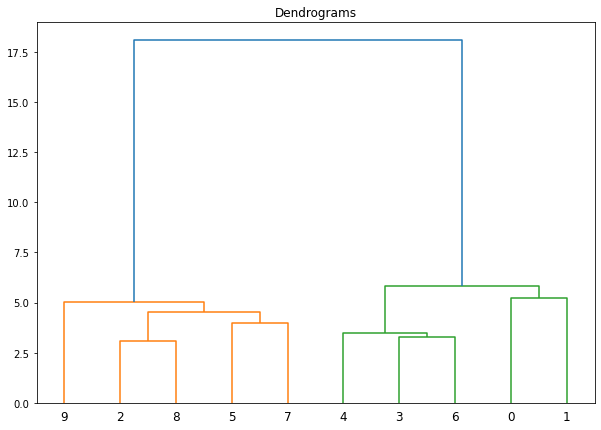

In [4]:
Z = linkage(hausdorff,method='single')

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = dendrogram(Z)
# print(dend)

In [5]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='single')

cluster.fit(hausdorff)
labels = cluster.labels_
labels

print([210,211,212,213,214,215,216,217,218,219])
print(labels)

[210, 211, 212, 213, 214, 215, 216, 217, 218, 219]
[0 0 1 0 0 1 0 1 1 1]


In [6]:
with open('0.2.json') as f:
    data1 = json.load(f)
    
with open('0.14.json') as f:
    data2 = json.load(f)
    
with open('219.json') as f:
    data3 = json.load(f)
    print(len(data3[0]))

73


In [20]:
nbrs = NearestNeighbors(n_neighbors=6, algorithm='kd_tree').fit(hausdorff)

In [21]:
distances, indices = nbrs.kneighbors(hausdorff)

In [22]:
name = [210,211,212,213,214,215,216,217,218,219]

In [23]:
neighbors = {}
for indice in range(len(indices)):
    neighbors[name[indice]] = []   
#     print(indice)
    for i in range(1,len(indices[indice])):
        pass
#         print(i)
        neighbors[name[indice]].append(name[indices[indice][i]])

In [24]:
neighbors

{210: [211, 214, 216, 213, 215],
 211: [210, 214, 216, 213, 215],
 212: [218, 215, 219, 217, 210],
 213: [216, 214, 211, 210, 215],
 214: [213, 216, 211, 210, 215],
 215: [217, 218, 212, 219, 210],
 216: [213, 214, 211, 210, 215],
 217: [215, 219, 218, 212, 210],
 218: [212, 215, 217, 219, 210],
 219: [217, 218, 212, 215, 210]}